In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import Brazil COVID-19 Subset

In [ ]:
bc=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/covid19_clinical_dataset.csv')

Identification of data types:

In [ ]:
bc.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

Size of the dataset:

In [ ]:
bc.shape

(5644, 111)

Statistical Summary of Numeric Variables:

In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [ ]:
bc.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Density,Urine - Sugar,Urine - Red blood cells,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.187396e-09,-1.598342e-08,-3.820598e-10,7.373957e-09,8.416943e-09,-7.863787e-09,9.784053e-10,6.218887e-09,-6.594685e-09,-3.378738e-09,7.146180e-09,-4.149502e-09,-3.269551e-09,1.020598e-08,7.067308e-09,NaN,5.890838e-09,-6.707809e-09,2.760870e-09,-6.669811e-09,2.053100e-08,1.105946e-08,2.742222e-09,-5.265486e-10,-1.535948e-09,-2.626374e-09,1.206044e-08,3.170330e-09,-2.048611e-09,1.914000e-08,-5.225000e-09,-1.935294e-08,1.508088e-08,-1.058824e-09,-7.933824e-09,0.0,-9.139706e-09,3.617647e-09,-4.463235e-09,2.793815e-09,-2.670103e-08,7.257732e-09,8.453608e-09,1.410309e-08,0.0,-2.585714e-09,NaN,7.585714e-09,NaN,-9.230769e-10,-4.774436e-09,1.752475e-09,NaN,-2.000000e-08,-6.471154e-09,7.260870e-09,-1.370370e-09,-3.875000e-09,NaN,-5.769231e-09,-1.851852e-10,8.370370e-09,-1.703704e-09,3.333333e-10,-7.444444e-09,6.000000e-09,-2.481481e-08,4.650000e-09,6.250000e-09,5.185185e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

In [ ]:
bc.columns.values

array(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella p

In [ ]:
bc.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Graphical Univariate Analysis:

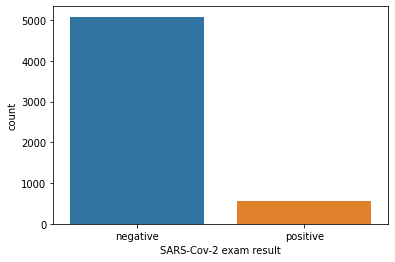

In [ ]:
#CountPlot

sns.countplot(bc['SARS-Cov-2 exam result'])

In [ ]:
#number and percentage of missing values in each column

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(bc)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Total,0,0,0,0,0,0,5041,5041,5042,5045,5042,5042,5042,5042,5042,5042,5042,5042,5043,5042,5436,4290,4290,4290,4292,4292,4292,5644,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,5131,...,5584,5574,5574,5574,5574,5587,5643,5574,5575,5584,5644,5574,5574,5574,5577,5575,5574,5574,5644,5553,5511,5543,5644,5641,5540,5621,5617,5636,5644,5631,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0,0,0,0,0,0,89.3161,89.3161,89.3338,89.387,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3515,89.3338,96.3147,76.0099,76.0099,76.0099,76.0454,76.0454,76.0454,100,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,90.9107,...,98.9369,98.7597,98.7597,98.7597,98.7597,98.9901,99.9823,98.7597,98.7775,98.9369,100,98.7597,98.7597,98.7597,98.8129,98.7775,98.7597,98.7597,100,98.3877,97.6435,98.2105,100,99.9468,98.1573,99.5925,99.5216,99.8583,100,99.7697,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.6456,99.6456,99.5216
Types,object,int64,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,float64,...,object,object,object,object,object,object,object,float64,object,object,float64,object,object,float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


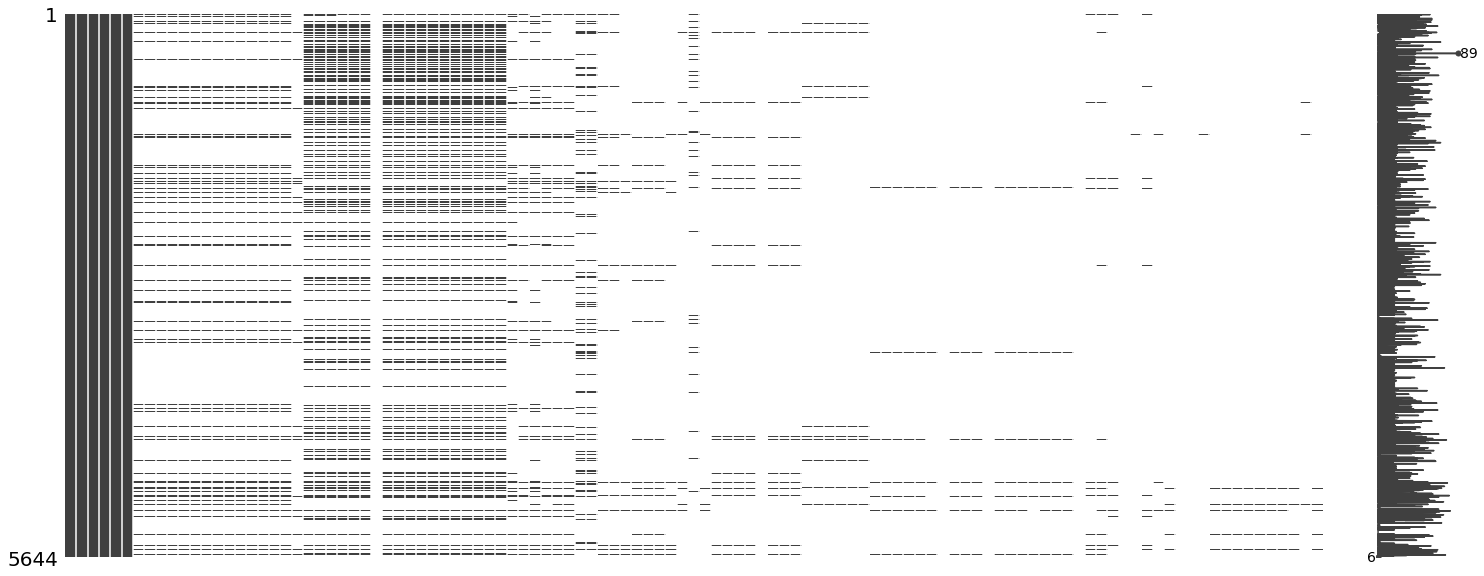

In [ ]:
#Handle Null Values
#check the distribution of values

import missingno as msno
msno.matrix(bc.head(20000))

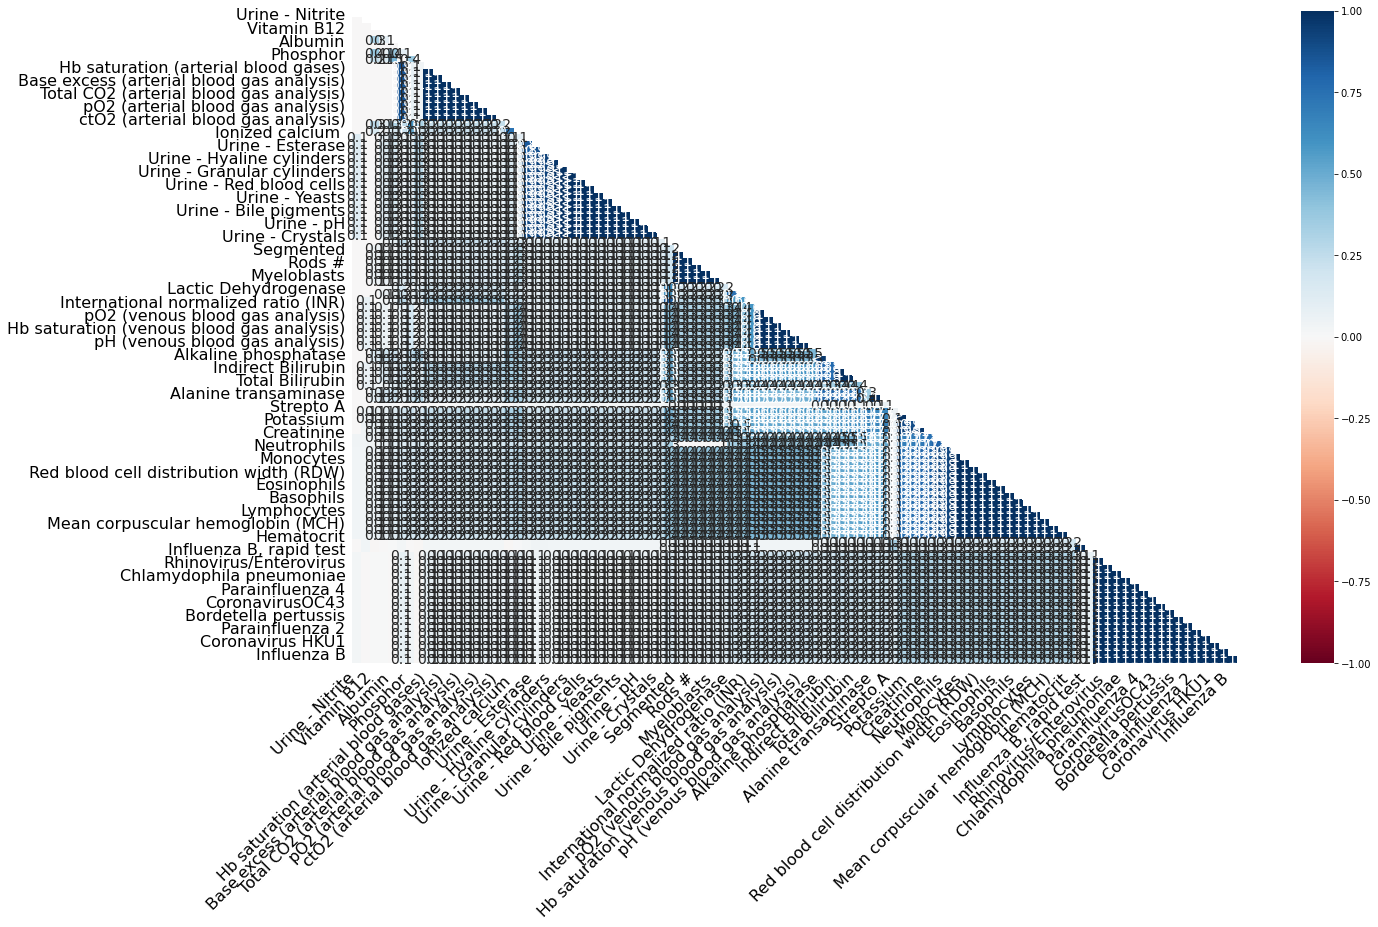

In [ ]:
#Heatmap to check the distribution of null values

msno.heatmap(bc, sort='ascending')

In [ ]:
# Number of each type of column

bc.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [ ]:
# Number of unique classes in each object column

bc.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


Patient ID                     5644
SARS-Cov-2 exam result            2
Respiratory Syncytial Virus       2
Influenza A                       2
Influenza B                       2
Parainfluenza 1                   2
CoronavirusNL63                   2
Rhinovirus/Enterovirus            2
Coronavirus HKU1                  2
Parainfluenza 3                   2
Chlamydophila pneumoniae          2
Adenovirus                        2
Parainfluenza 4                   2
Coronavirus229E                   2
CoronavirusOC43                   2
Inf A H1N1 2009                   2
Bordetella pertussis              2
Metapneumovirus                   2
Parainfluenza 2                   1
Influenza B, rapid test           2
Influenza A, rapid test           2
Strepto A                         3
Urine - Esterase                  2
Urine - Aspect                    4
Urine - pH                       11
Urine - Hemoglobin                3
Urine - Bile pigments             2
Urine - Ketone Bodies       

In [ ]:
#calculate the correlations between the features in dataset

features = bc.columns.values[2:112]
corr = bc[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corr = corr[corr['level_0'] != corr['level_1']]
corr.head(10)

,level_0,level_1,0
0,pCO2 (arterial blood gas analysis),Promyelocytes,0.000000e+00
1,Promyelocytes,pCO2 (arterial blood gas analysis),0.000000e+00
2,Promyelocytes,HCO3 (arterial blood gas analysis),0.000000e+00
3,HCO3 (arterial blood gas analysis),Promyelocytes,0.000000e+00
4,Promyelocytes,Gamma-glutamyltransferase,6.672182e-18
5,Gamma-glutamyltransferase,Promyelocytes,6.672182e-18
6,Myelocytes,Creatine phosphokinase (CPK),8.744900e-18
7,Creatine phosphokinase (CPK),Metamyelocytes,8.744900e-18
8,Metamyelocytes,Creatine phosphokinase (CPK),8.744900e-18
9,Creatine phosphokinase (CPK),Myelocytes,8.744900e-18


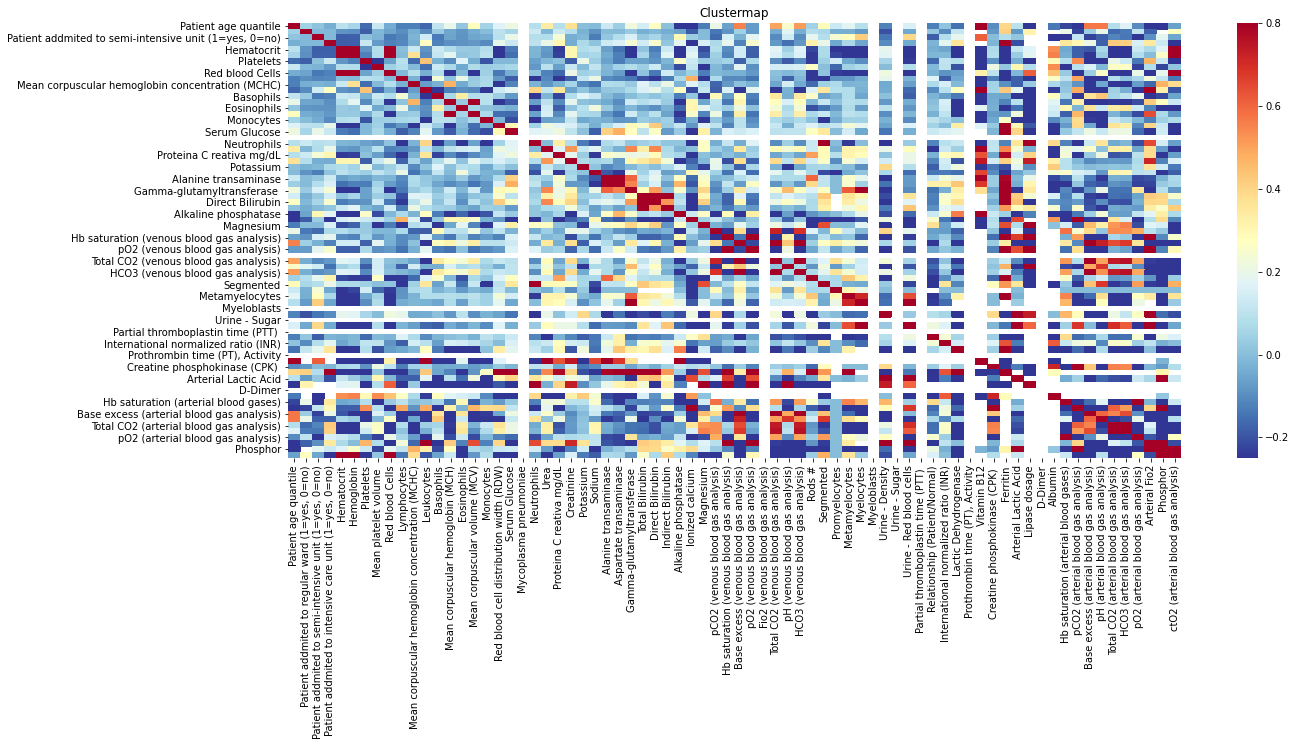

In [ ]:
#Correlations clustermap

corrs = bc.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = False, vmax = 0.8)
plt.title('Clustermap');

In [ ]:
bc.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

#fill in mean for floats
for c in bc.columns:
    if bc[c].dtype=='float16' or  bc[c].dtype=='float32' or  bc[c].dtype=='float64':
        bc[c].fillna(bc[c].mean())

#fill in -999 for categoricals
bc = bc.fillna(-999)
# Label Encoding
for f in bc.columns:
    if bc[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(bc[f].values))
        bc[f] = lbl.transform(list(bc[f].values))

In [ ]:
#Remove Collinear Variables

# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = bc.corr().abs()
corr_matrix.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,1.000000,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,0.001993,0.001987,0.001965,0.001963,0.001982,0.001986,0.001994,0.001997,0.002886,0.001990,0.003019,0.003093,0.003210,0.004073,0.004184,0.001755,0.008048,NaN,0.003829,0.005378,0.004730,0.003409,0.004724,0.003164,0.003991,0.006590,0.004026,0.004800,0.004472,0.000498,...,0.014501,0.016011,0.017005,0.013409,0.017971,0.008254,0.004555,0.018895,0.015596,0.018324,NaN,0.018100,0.019843,0.018904,0.020732,0.021325,0.018901,0.018446,NaN,0.001224,0.009923,0.011182,NaN,0.002073,0.004570,0.010426,0.002842,0.010422,NaN,0.005787,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
Patient age quantile,0.014136,1.000000,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,0.109901,0.109871,0.109871,0.109857,0.109951,0.109981,0.109921,0.110010,0.110938,0.109971,0.086764,0.004644,0.018124,0.010242,0.017652,0.018663,0.001011,NaN,0.018832,0.018431,0.017502,0.013473,0.014038,0.017466,0.017221,0.011411,0.016905,0.016024,0.017278,0.128227,...,0.011549,0.007090,0.000529,0.020280,0.015301,0.029753,0.015396,0.013760,0.015766,0.006880,NaN,0.016582,0.000144,0.013796,0.011232,0.011172,0.013775,0.011810,NaN,0.034807,0.069076,0.036491,NaN,0.033328,0.018430,0.024904,0.051744,0.017475,NaN,0.015257,0.051720,0.051703,0.051778,0.051778,0.051743,0.051749,0.051730,0.050366,0.020413,0.051732
SARS-Cov-2 exam result,0.018664,0.075244,1.000000,0.142437,0.019364,0.027586,0.044974,0.044976,0.045045,0.042017,0.045206,0.045151,0.045176,0.045042,0.045132,0.045146,0.045080,0.045135,0.045460,0.045141,0.039177,0.027175,0.029288,0.027726,0.029950,0.029459,0.009191,NaN,0.028903,0.029520,0.029582,0.029335,0.028965,0.030279,0.029643,0.023993,0.030012,0.029274,0.030134,0.050128,...,0.028066,0.027256,0.010174,0.012062,0.026156,0.018896,0.004409,0.027218,0.026858,0.022418,NaN,0.015189,0.013793,0.027234,0.023984,0.027972,0.027243,0.025262,NaN,0.028300,0.038541,0.071729,NaN,0.007639,0.056124,0.002541,0.088860,0.034866,NaN,0.015915,0.088889,0.088836,0.088889,0.088910,0.088845,0.088849,0.088910,0.070122,0.009768,0.088905
"Patient addmited to regular ward (1=yes, 0=no)",0.003748,0.046166,0.142437,1.000000,0.011264,0.010192,0.24

In [ ]:
# Upper triangle of correlations

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
bc = bc.drop(columns = to_drop)
print('Data shape: ', bc.shape)
print('Size of the data', bc.shape)

There are 64 columns to remove.
Data shape:  (5644, 47)
Size of the data (5644, 47)


In [ ]:
#Remove Missing Values

# Dataset missing values (in percent)

bc_missing = (bc.isnull().sum() / len(bc)).sort_values(ascending = False)
bc_missing.head()

Phosphor            0.0
Urea                0.0
Magnesium           0.0
Strepto A           0.0
Ionized calcium     0.0
dtype: float64

In [ ]:
#Checking the skewness

bc.skew()

Patient ID                                                0.000000
Patient age quantile                                      0.034623
SARS-Cov-2 exam result                                    2.688541
Patient addmited to regular ward (1=yes, 0=no)            8.276088
Patient addmited to semi-intensive unit (1=yes, 0=no)    10.485579
Patient addmited to intensive care unit (1=yes, 0=no)    11.607647
Hematocrit                                                2.546166
Serum Glucose                                             4.917908
Respiratory Syncytial Virus                               1.248329
Mycoplasma pneumoniae                                     0.000000
Neutrophils                                               2.847151
Urea                                                      3.361300
Proteina C reativa mg/dL                                  2.873509
Potassium                                                 3.505692
Influenza B, rapid test                                   2.36

In [ ]:
#dummifying data required for spliting the data

bc = pd.get_dummies(bc)
bc.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Serum Glucose,Respiratory Syncytial Virus,Mycoplasma pneumoniae,Neutrophils,Urea,Proteina C reativa mg/dL,Potassium,"Influenza B, rapid test",Alanine transaminase,Gamma-glutamyltransferase,Total Bilirubin,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Rods #,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Ketone Bodies,Urine - Nitrite,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Arteiral Fio2,Phosphor
0,1588,13,0,0,0,0,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,451,17,0,0,0,0,0.236515,-0.140648,2,-999.0,-0.619086,1.198059,-0.147895,-0.305787,1,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,3669,8,0,0,0,0,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,5457,5,0,0,0,0,-999.000000,-999.000000,0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,4843,15,0,0,0,0,-999.000000,-999.000000,2,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = bc['SARS-Cov-2 exam result']
X = bc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1280
           1       1.00      1.00      1.00       131

    accuracy                           1.00      1411
   macro avg       1.00      1.00      1.00      1411
weighted avg       1.00      1.00      1.00      1411



In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1280
           1       1.00      0.99      1.00       131

    accuracy                           1.00      1411
   macro avg       1.00      1.00      1.00      1411
weighted avg       1.00      1.00      1.00      1411



In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()

models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))

Decision Tree: 1.000000 (0.000000)
Decision Tree with Gini Coefficient: 1.000000 (0.000000)
K Nearest Neighbors: 0.895251 (0.010258)
Naive Bayes: 0.995746 (0.000019)
Random Forrest: 0.999823 (0.000000)
Random Forrest with Gini Coefficient: 1.000000 (0.000000)
Bagging Classifier: 1.000000 (0.000000)


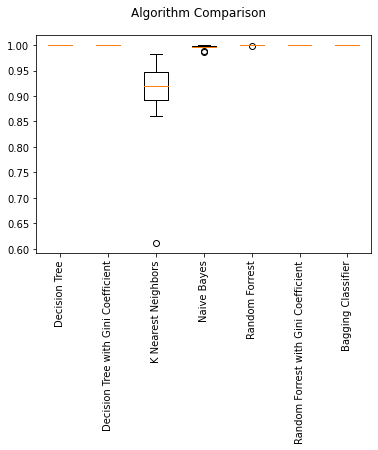

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(knn,'Brazil_Covid.pkl')

['Brazil_Covid.pkl']